## Multiclass Classification
We will build an Image Classifier using SVM and one vs one classification technique. We have a dataset which has four classes - dog, cat, horse and human.

### 1. Dataset Preparation
Loading images data

In [1]:
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt

# for iterating over folders and working with files, there are 2 important files - pathlib & os
import os
from pathlib import Path

In [2]:
# defining a path for images folder
p = Path('images/')
print(p)
print(type(p))

images
<class 'pathlib.PosixPath'>


In [3]:
# this method accepts a regular expression for what type of files we want to look in the path
# it gives a genrator object
# we can iterate over this object and get all the values which are inside this folder

dirs = p.glob("*")   # * means everything

# we cannot directly append the label, so we create a mapping (dictionary)
labels_dict = {"cat":0, "dog":1, "horse":2, "human":3}

image_data = []
labels = []

for folder_dir in dirs:
    print(folder_dir)  # we get paths of all the folders which are inside the images folder
    
# extracting a label 
# when we have images, we don't have explicit labels and need to generate labels from the folder
    label = str(folder_dir).split(sep='/')[-1][:-1]   # folder name
    print(label)
    
    # iterating over all the images inside every folder
    for img_path in folder_dir.glob("*.jpg"):          # we are looking at all jpg files
        print(img_path)   # we are getting the path of every image
        
        # converting image to array format to get iamge array for every image
        img = image.load_img(img_path,target_size=(32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

images/dogs
dog
images/dogs/dog.167.jpg
images/dogs/dog.173.jpg
images/dogs/dog.36.jpg
images/dogs/dog.22.jpg
images/dogs/dog.198.jpg
images/dogs/dog.199.jpg
images/dogs/dog.23.jpg
images/dogs/dog.37.jpg
images/dogs/dog.172.jpg
images/dogs/dog.166.jpg
images/dogs/dog.170.jpg
images/dogs/dog.164.jpg
images/dogs/dog.21.jpg
images/dogs/dog.158.jpg
images/dogs/dog.35.jpg
images/dogs/dog.159.jpg
images/dogs/dog.34.jpg
images/dogs/dog.20.jpg
images/dogs/dog.165.jpg
images/dogs/dog.171.jpg
images/dogs/dog.149.jpg
images/dogs/dog.24.jpg
images/dogs/dog.30.jpg
images/dogs/dog.175.jpg
images/dogs/dog.18.jpg
images/dogs/dog.161.jpg
images/dogs/dog.160.jpg
images/dogs/dog.174.jpg
images/dogs/dog.19.jpg
images/dogs/dog.31.jpg
images/dogs/dog.148.jpg
images/dogs/dog.25.jpg
images/dogs/dog.202.jpg
images/dogs/dog.200.jpg
images/dogs/dog.33.jpg
images/dogs/dog.27.jpg
images/dogs/dog.162.jpg
images/dogs/dog.176.jpg
images/dogs/dog.189.jpg
images/dogs/dog.188.jpg
images/dogs/dog.177.jpg
images/dogs/dog.

images/humans/rider-175.jpg
images/humans/rider-161.jpg
images/humans/rider-80.jpg
images/humans/rider-149.jpg
images/humans/rider-94.jpg
images/humans/rider-43.jpg
images/humans/rider-57.jpg
images/humans/rider-5.jpg
images/humans/rider-18.jpg
images/humans/rider-30.jpg
images/humans/rider-24.jpg
images/humans/rider-106.jpg
images/humans/rider-112.jpg
images/humans/rider-113.jpg
images/humans/rider-107.jpg
images/humans/rider-25.jpg
images/humans/rider-31.jpg
images/humans/rider-19.jpg
images/humans/rider-4.jpg
images/humans/rider-6.jpg
images/humans/rider-27.jpg
images/humans/rider-33.jpg
images/humans/rider-111.jpg
images/humans/rider-105.jpg
images/humans/rider-139.jpg
images/humans/rider-138.jpg
images/humans/rider-104.jpg
images/humans/rider-110.jpg
images/humans/rider-32.jpg
images/humans/rider-26.jpg
images/humans/rider-7.jpg
images/humans/rider-3.jpg
images/humans/rider-22.jpg
images/humans/rider-36.jpg
images/humans/rider-128.jpg
images/humans/rider-114.jpg
images/humans/ride

In [4]:
# we have 808 training points and 808 labels
print(len(image_data))
print(len(labels))

808
808


In [5]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)
print(image_data.shape, labels.shape)
# so we have 808 images, each image has 100X100 size and 3 is the no of channels or depth of image 

(808, 32, 32, 3) (808,)


Randomly shuffling the data

In [7]:
import random

In [8]:
# combining the data to a list which is zipping of image_data and labels
combined_data = list(zip(image_data,labels))
random.shuffle(combined_data)

In [9]:
# unzipping
# * is used to unzip anything which has been zipped (1st part will go to images & 2nd to labels)
image_data[:], labels[:] = zip(*combined_data)

### 2. Visualising the Data

In [10]:
def drawImag(img):
    plt.imshow(img)
    plt.axis("off")   # turning off the axis in the images
    plt.show()
    return

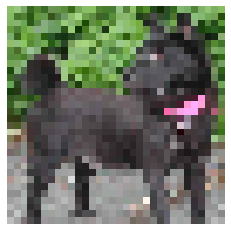

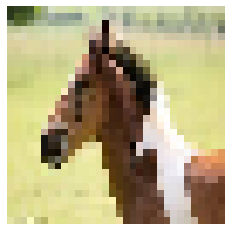

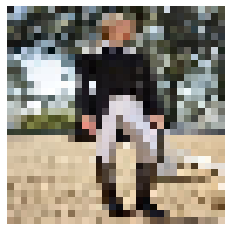

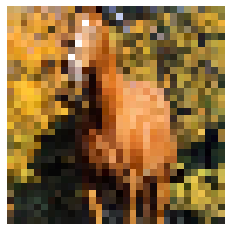

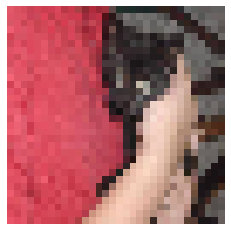

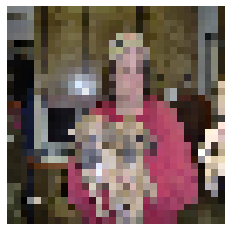

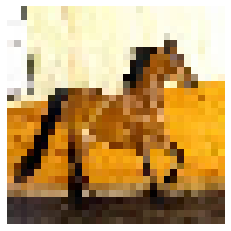

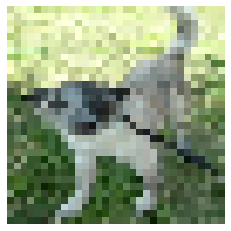

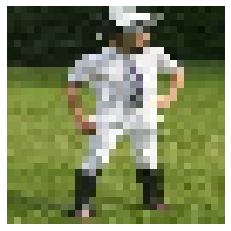

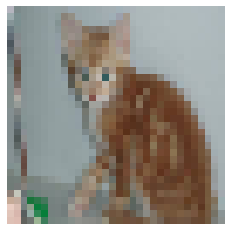

In [11]:
for i in range(10):
    drawImag(image_data[i])

### 3. SVM Classification

In [12]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C        # parameter for penalty (how much we want to penalize the outliers)
        self.W = 0        # weights used for the hyperplane
        self.b = 0        # bias term

    # computing the loss
    def hingeLoss(self,W,b,X,Y):
        loss = 0.0
        loss += .5*np.dot(W,W.T)
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T) + b)
            loss += self.C * max(0,(1-ti))
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.00001,maxItr=1000):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        # initialize the model parameters - weight matrix W and bias term b
        W = np.zeros((1,no_of_features))
        bias = 0
        
        # training part
        losses = []
        
        for i in range(maxItr):
            # training loop 
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            # after randomly shuffling, we take the first batch and compute the gradient over these
            # examples, update the weights and bias, then iterate over next batch and so on
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # we are going to iterate over all the batches in 1 epoch
            # batch gradient descent (paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                # assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                # iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    # at any time if we go out of index, this condition will help us to avoid that
                    if j<no_of_samples:
                        i = ids[j]      # example that we are going to pick
                        ti = Y[i]*(np.dot(W,X[i].T) + bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                
                # gradient for the batch is ready, so we update W and b
                W = W - n*W + n*gradw
                bias = bias + n*gradb 
                
        self.W = W
        self.b = bias
        return W,bias,losses

We need to convert data for One-for-One classification. 

In [13]:
M = image_data.shape[0]
image_data = image_data.reshape(M,-1)    # flattening every image into a single row
print(image_data.shape)
print(labels.shape)
# now every example/image has 3072 features

(808, 3072)
(808,)


In [14]:
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [15]:
def classWiseData(x,y):
    data = {}
    
    for i in range(CLASSES):
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [16]:
data = classWiseData(image_data,labels)

In [17]:
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)
print(data[3].shape)
# each has 202 images and each image has 3072 features

(202, 3072)
(202, 3072)
(202, 3072)
(202, 3072)


In [18]:
# we give training data of two classes, d1 & d2 and then we merge them into a single matrix
def getDataPairForSVM(d1,d2):   
    """combines data of two classes into a single matrix"""
    l1, l2 = d1.shape[0], d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2   
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair, data_labels

#### Training nC2 SVM 
Feeding pairs of data to SVM classifier and training the model

In [19]:
mySVM = SVM()

In [20]:
def trainSVMs(x,y):
    svm_classifiers = {}
    
    # making nC2 classifiers
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair)
            svm_classifiers[i][j] = (wts,b)
            
            plt.style.use("seaborn")
            plt.plot(loss)
            plt.show()
    return svm_classifiers

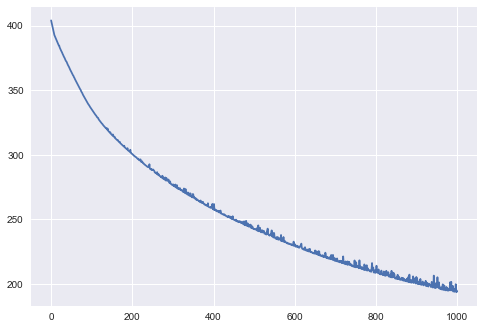

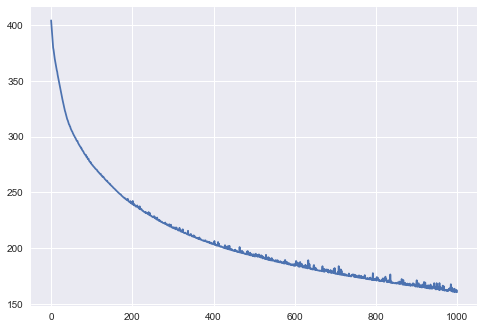

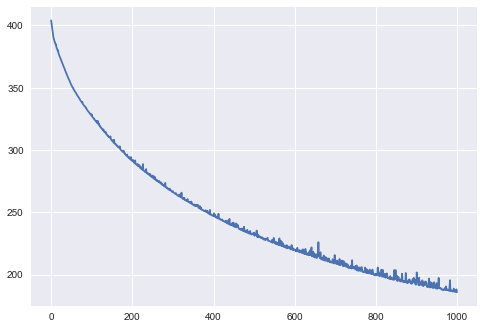

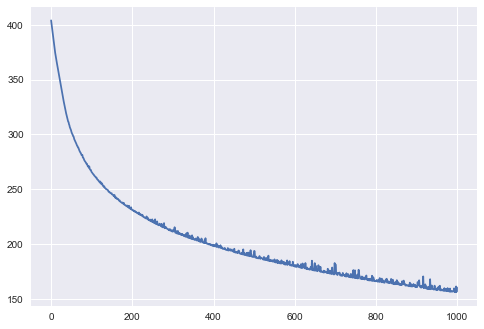

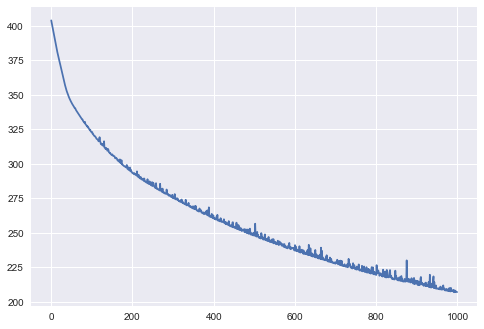

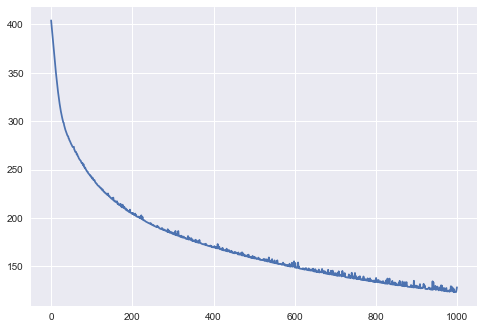

In [21]:
svm_classifiers = trainSVMs(image_data,labels)

In [22]:
# parameters of the model in which the first class we trained was 0 and second was 1 (cats & dogs)
cats_dogs = svm_classifiers[0][1]
print(cats_dogs[0].shape)  # 3072 weights
print(cats_dogs[1])        # bias

(1, 3072)
-0.05852999999999995


In [23]:
# classifier for cats and humans
cats_humans = svm_classifiers[0][3]

### 4. Prediction

In [24]:
# actual prediction of SVM
def binaryPredict(x,w,b):
    z = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [25]:
def predict(x):
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            
            # taking a majority prediction from each of the classifier
            # we will see which classifier has predicted which class
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
                
    final_prediction = np.argmax(count)
    return final_prediction

In [26]:
print(predict(image_data[0]))
print(labels[0])

1
1


In [27]:
def accuracy(x,y):
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if (prediction==y[i]):
            count += 1
    return count/x.shape[0]         # total correct predictions/total number of examples

In [28]:
accuracy(image_data,labels)

0.6076732673267327

### 5. SVM using scikit learn

In [29]:
from sklearn import svm

In [30]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [31]:
# it will handle the multi-class classification by itself and we do not need to do anything
svm_classifier.fit(image_data,labels)

SVC(kernel='linear')

In [32]:
svm_classifier.score(image_data,labels)

0.6410891089108911